An analysis of classifiers

The dataset used for the study encompasses a study of proteins that have differential expression in a learning experiment. The control used in this experiment are a set of wild type mice(functionally normal) and are compared to trisomic mice (Down's syndrome, that inherently have learning disabilities). Within the control experiment, it is further divided into 2 levels which was used to compared the learning capability with ot without exposing to Context Shock prior to the experiment. In each of those subcategories these mice were thery were subjected to saline(control) or memantine(a drug that rescues certain learning and motor capabilities under neurological condition such as Down's syndrome). Similar sets of classes were created for mice with Down's syndrome. Therefore this experiment had in total 8 classes. 'There were 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse'.[1]
The objective of this dataset was to understand at cellular level which proteins are invoked under various stimuli. Using the class label as the target and 77 proteins as the features, the aim is to classify them into different classes and check the viability of the algorithms on test dataset. Therefore the aim og the project is to use features from the given dataset to classify the type of mice (based on the level of genotypic,behavioural and drug induced). Equal specimens from each class was used in the training dataset to evaluate the unknown from the test dataset.

This dataset was collected from UCI machine learning repository. However, the original dataset was from a research study - Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome - Clara Higuera,Katheleen J. Gardiner,Krzysztof J. Cios. Weblink - https://doi.org/10.1371/journal.pone.0129126 The article states that, 'This is an open access article distributed under the terms of the Creative Commons Attribution License, which permits unrestricted use, distribution, and reproduction in any medium, provided the original author and source are credited. This dataset has been licensed under Creative Commons (CC) BY 4.0. The data is originally stored on data repository API site called figshare wherein the data can be freely downloadable which allows 1)Share — copy and redistribute the material in any medium or formatand 2) Adapt — remix, transform, and build upon the material for any purpose, even commercially.

Ensemble learning

In [297]:
import os
import pandas as pd
import numpy as np

link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
print('URL:', link)

df = pd.read_excel(link,
                 encoding='utf-8')

df.head()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

The target column was not preprocessed into a pipeline because in predict function, its requires only the features as an input to predict the traget as the output. Therefore the class column was converted into an integer class from mapping function before implementing all the preprocesses applied to the original dataframe.

In [120]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
class_mapping

{'c-CS-m': 0,
 'c-CS-s': 1,
 'c-SC-m': 2,
 'c-SC-s': 3,
 't-CS-m': 4,
 't-CS-s': 5,
 't-SC-m': 6,
 't-SC-s': 7}

In [121]:
df['class'] = df['class'].map(class_mapping)
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,0
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,0
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,0
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,0
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.10

In [122]:
X = df.iloc[:,0:81]
y = df['class']

Separate data into training and test 

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     stratify=y,
                     random_state=1)

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

to_be_removed = ['MouseID','Genotype','Treatment','Behavior','BAD_N','BCL2_N','pCFOS_N','H3AcK18_N','EGR1_N','H3MeK4_N','DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N','pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pELK_N','pJNK_N','PKCA_N','pMEK_N','pNR1_N','pNR2A_N','pNR2B_N','pPKCAB_N','pRSK_N','AKT_N','BRAF_N','CAMKII_N','CREB_N','ELK_N','ERK_N','GSK3B_N','JNK_N','MEK_N','TRKA_N','RSK_N','Bcatenin_N','MTOR_N','P38_N','pMTOR_N','DSCR1_N','AMPKA_N','NR2B_N','pNUMB_N','RAPTOR_N','TIAM1_N','pP70S6_N','NUMB_N','P70S6_N','pGSK3B_N','CDK5_N','S6_N','ADARB1_N','AcetylH3K9_N','RRP1_N','BAX_N','ARC_N','ERBB4_N','nNOS_N','Tau_N','GFAP_N','GluR3_N','GluR4_N','IL1B_N','P3525_N','pCASP9_N','PSD95_N','SNCA_N','pGSK3B_Tyr216_N','SHH_N','pS6_N','SYP_N']

##Feature selection performed from project 01
numeric_features = ['SOD1_N','pPKCG_N','pERK_N','APP_N','CaNA_N','Ubiquitin_N']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [172]:
##Reference:
##https://www.mikulskibartosz.name/preprocessing-the-input-pandas-dataframe-using-columntransformer-in-scikit-learn/

preprocessor = ColumnTransformer(
    remainder = 'passthrough',
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('remove', 'drop', to_be_removed)
])

In [167]:
preprocessor.fit_transform(df)

array([[-0.61711514, -0.45575874,  0.41276943, ...,  1.06590091,
        -1.11983482,  0.        ],
       [-0.71433269, -0.46203864,  0.43336635, ...,  1.28029118,
        -1.32211812,  0.        ],
       [-0.70927411, -0.31518956,  0.38214129, ...,  1.85703831,
        -1.39725041,  0.        ],
       ...,
       [ 0.4264525 ,  1.59413441, -0.84295284, ...,  0.29352469,
         0.01716445,  7.        ],
       [ 0.55713637,  1.64847672, -0.91372574, ...,  0.2089962 ,
         0.35620188,  7.        ],
       [ 0.87279308,  1.64020927, -0.78173889, ...,  0.10478825,
         0.16051442,  7.        ]])

In [168]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
model = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=1, solver='newton-cg', multi_class='multinomial'))
    
a = model.fit(X_train,y_train)

y_pred = a.predict(X_test)

print('Training accuracy:', a.score(X_train, y_train))
print('Test Accuracy: %.3f' % a.score(X_test, y_test))

Training accuracy: 0.7103174603174603
Test Accuracy: 0.691


In [169]:
from sklearn.ensemble import RandomForestClassifier
model1 = make_pipeline(
    preprocessor,
    RandomForestClassifier(criterion='gini',
                           n_estimators=50, 
                           random_state=1,
                           n_jobs=2))
b = model1.fit(X_train,y_train)
y_pred1 = b.predict(X_test)

print('Training accuracy:', b.score(X_train, y_train))
print('Test Accuracy: %.3f' % b.score(X_test, y_test))

Training accuracy: 1.0
Test Accuracy: 0.895


In [170]:
from sklearn.neighbors import KNeighborsClassifier

model2 = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=15))

c = model2.fit(X_train,y_train)
y_pred2 = c.predict(X_test)

print('Training accuracy:', c.score(X_train, y_train))
print('Test accuracy:', c.score(X_test, y_test))

Training accuracy: 0.843915343915344
Test accuracy: 0.7777777777777778


Conclusion:
Based on all the metrics from the classification algorithms, the accuracies are same as those compared to Project 1.

Part2:

In order to perform a more equal comparison of your models' performance, and to ensure that we have the best set of hyperparameters in use, implement nested cross-validation for each algorithm using the GridSearchCV class and cross_val_score function. For each of your algorithms that you are comparing, create a list of values for each applicable hyperparameter and provide it as the param_grid for the GridSearchCV class. Compare this nested cross-validation technique to the model comparison you performed in project 01. Are your findings different now that the models are tuned and compared in an unbiased manner?

In [261]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid={'logisticregression__C':[0.001,0.01,0.1,1.0,10.0,100.0]}

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)


#model.get_params().keys()

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

scores = cross_val_score(clf, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


0.736701754385965
{'logisticregression__C': 100.0}
CV accuracy: 0.730 +/- 0.044


In [264]:
##Reference: The parameters were refered from the following link
##https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
from sklearn.ensemble import RandomForestClassifier

param_grid1 = { 
    'randomforestclassifier__n_estimators': list(range(10,101,10)),
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth' : [4,5,6,7,8],
    'randomforestclassifier__criterion' :['gini', 'entropy']
}

gs1 = GridSearchCV(estimator=model1, 
                  param_grid=param_grid1, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=4)


#model1.get_params().keys()

gs1 = gs1.fit(X_train, y_train)
print(gs1.best_score_)
print(gs1.best_params_)

scores = cross_val_score(gs1, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))



0.8678421052631577
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 70}
CV accuracy: 0.866 +/- 0.023


In [268]:
from sklearn.neighbors import KNeighborsClassifier

param_grid2 = {
    'kneighborsclassifier__n_neighbors':[3, 5, 7, 9, 11,15],
    'kneighborsclassifier__weights':['uniform'],
    'kneighborsclassifier__metric':['euclidean','manhattan']}

gs2 = GridSearchCV(estimator=model2, 
                  param_grid=param_grid2, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=4)


#model2.get_params().keys()

gs2 = gs2.fit(X_train, y_train)
print(gs2.best_score_)
print(gs2.best_params_)

scores = cross_val_score(gs2, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

0.894157894736842
{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}
CV accuracy: 0.890 +/- 0.007


Conclusion:

By optimizing the hyperparameters, it was observed that there was a slight improvement in accuracy with regards to Random Forest and KNN neighbours. There was a 100% accuracy in training datset when Random Forest model was used. This seemed to have occured by overfitting. However it is seen that there is a decrease in accyracy by using the appropriate hyperparameter. There wasn't any improvement in logistic regression because the same optimized parameter was used from project01.

Part3 

Create a confusion matrix showing the TP, FP, TN, and FN values for each of the three optimized models that were created using nested cross validation in step 2. Visualize the confusion matrix using a similar technique to the one that was used in the ch06 example Jupyter Notebook

In [290]:
from sklearn.metrics import confusion_matrix
##logistic regression
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[31  9  0  0  1  4  0  0]
 [10 27  0  0  1  3  0  0]
 [ 0  0 38  4  0  0  2  1]
 [ 0  0  3 30  0  0  5  2]
 [ 8  2  0  0 24  6  0  0]
 [ 3  0  0  0 12 17  0  0]
 [ 0  0  7  2  0  0 31  0]
 [ 0  0  1  2  0  0  2 36]]


In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.72

Micro Precision: 0.72
Micro Recall: 0.72
Micro F1-score: 0.72

Macro Precision: 0.72
Macro Recall: 0.72
Macro F1-score: 0.72

Weighted Precision: 0.72
Weighted Recall: 0.72
Weighted F1-score: 0.72

Classification Report

              precision    recall  f1-score   support

     Class 1       0.60      0.69      0.64        45
     Class 2       0.71      0.66      0.68        41
     Class 3       0.78      0.84      0.81        45
     Class 4       0.79      0.75      0.77        40
     Class 5       0.63      0.60      0.62        40
     Class 6       0.57      0.53      0.55        32
     Class 7       0.78      0.78      0.78        40
     Class 8       0.92      0.88      0.90        41

    accuracy                           0.72       324
   macro avg       0.72      0.72      0.72       324
weighted avg       0.72      0.72      0.72       324



In [292]:
from sklearn.metrics import confusion_matrix
##Random forest
gs1.fit(X_train, y_train)
y_pred1 = gs1.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred1)
print(confmat)

[[39  5  0  0  0  1  0  0]
 [ 3 37  0  0  1  0  0  0]
 [ 0  0 43  0  0  0  2  0]
 [ 0  0  0 38  0  0  1  1]
 [ 4  3  0  0 32  1  0  0]
 [ 6  1  0  0  3 22  0  0]
 [ 0  0  1  3  0  0 36  0]
 [ 0  0  1  0  0  0  2 38]]


In [294]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred1)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred1, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred1, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.72

Macro Precision: 0.89
Macro Recall: 0.87
Macro F1-score: 0.88

Weighted Precision: 0.89
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

     Class 1       0.75      0.87      0.80        45
     Class 2       0.80      0.90      0.85        41
     Class 3       0.96      0.96      0.96        45
     Class 4       0.93      0.95      0.94        40
     Class 5       0.89      0.80      0.84        40
     Class 6       0.92      0.69      0.79        32
     Class 7       0.88      0.90      0.89        40
     Class 8       0.97      0.93      0.95        41

    accuracy                           0.88       324
   macro avg       0.89      0.87      0.88       324
weighted avg       0.89      0.88      0.88       324



In [295]:
from sklearn.metrics import confusion_matrix
##KNN
gs2.fit(X_train, y_train)
y_pred2 = gs2.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred2)
print(confmat)

[[43  1  0  0  0  1  0  0]
 [ 4 35  0  0  1  1  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  1 37  0  0  1  1]
 [ 4  1  0  0 34  1  0  0]
 [ 1  2  0  0  0 29  0  0]
 [ 0  0  1  2  0  0 37  0]
 [ 0  0  1  0  0  0  2 38]]


In [296]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred2)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred2, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred2, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred2, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

     Class 1       0.83      0.96      0.89        45
     Class 2       0.90      0.85      0.88        41
     Class 3       0.94      1.00      0.97        45
     Class 4       0.95      0.93      0.94        40
     Class 5       0.97      0.85      0.91        40
     Class 6       0.91      0.91      0.91        32
     Class 7       0.93      0.93      0.93        40
     Class 8       0.97      0.93      0.95        41

    accuracy                           0.92       324
   macro avg       0.92      0.92      0.92       324
weighted avg       0.92      0.92      0.92       324



Part 4)

In [285]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=100.0,
                          solver='newton-cg',
                          multi_class='multinomial',
                          random_state=1)

clf2 = RandomForestClassifier(criterion= 'entropy',
                               max_depth= 8, 
                               max_features= 'auto', 
                               n_estimators= 70)

clf3 = KNeighborsClassifier(metric= 'manhattan',
                            n_neighbors= 3, 
                            weights = 'uniform')

pipe1 = Pipeline([['preprocess', preprocessor],
                  ['clf1', clf1]])
pipe2 = Pipeline([['preprocess', preprocessor],
                  ['clf2', clf2]])
pipe3 = Pipeline([['preprocess', preprocessor],
                  ['clf3', clf3]])

clf_labels = ['Logistic regression', 'Random Forest', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc_ovr')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.96 (+/- 0.01) [Logistic regression]
ROC AUC: 0.99 (+/- 0.00) [Random Forest]
ROC AUC: 0.99 (+/- 0.00) [KNN]


The performance of ensemble models have outperformed significantly when compared to individual models.

Higuera, Clara; Gardiner, Katheleen J.; J. Cios, Krzysztof (2015): Protein expression levels of 77 proteins from Control and Down Syndrome mice. figshare. Dataset. https://doi.org/10.6084/m9.figshare.1421985.v1

Individual classifiers

2) Data Collection:

In [298]:
import os
import pandas as pd
import numpy as np

link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
print('URL:', link)

df = pd.read_excel(link,
                 encoding='utf-8')

df.head()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

3) Data Preprocessing

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [106]:
##Check missing values
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N   

In [4]:
##different classes in this dataset

#control mice, stimulated to learn, injected with memantine (10 mice)
df_cmcs = df.iloc[0:150,:]
#control mice, not stimulated to learn, injected with memantine (10 mice)
df_cmsc = df.iloc[150:300,:]
#control mice, stimulated to learn, injected with saline (9 mice)
df_cscs = df.iloc[300:435,:]
#control mice, not stimulated to learn, injected with saline (9 mice)
df_cssc = df.iloc[435:570,:]

############################################################################################################################

#trisomy mice, stimulated to learn, injected with memantine (9 mice)
df_tmcs = df.iloc[570:707,:]
#trisomy mice, not stimulated to learn, injected with memantine (9 mice)
df_tmsc = df.iloc[570:840,:]
#trisomy mice, stimulated to learn, injected with saline (7 mice)
df_tscs = df.iloc[840:945,:]
#trisomy mice, not stimulated to learn, injected with saline (9 mice)
df_tssc = df.iloc[945:,:]

In [107]:
##dropped those columns since they were already classified in class labels
df1 = df.drop(['MouseID','Genotype', 'Treatment','Behavior'],axis=1)

In [108]:
##Replaced missing values with median of that column
df2 = df1.fillna(df1.median())
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# df.isnull().sum()

In [109]:
#mapping categorical labels
#create a mapping dict to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['class']))}
class_mapping

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

In [110]:
df2['class'] = df2['class'].map(class_mapping)
df2.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.129468,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.129468,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.129468,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.1

In [112]:
X = df2.iloc[:,0:77]
y = df2['class']
print('Class labels:', np.unique(y))

Class labels: [0 1 2 3 4 5 6 7]


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [114]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [150 135 150 135 135 105 135 135]
Labels counts in y_train: [105  94 105  95  95  73  95  94]
Labels counts in y_test: [45 41 45 40 40 32 40 41]


In [115]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Feature extraction 

In [116]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df1.columns[:77]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
plt.show()

##Proteins that had missing values 
# BAD_N              213
# BCL2_N             285
# pCFOS_N             75
# H3AcK18_N          180
# EGR1_N             210
# H3MeK4_N           270

[0.02464966 0.02480992 0.00540723 0.00696427 0.0062427  0.00866212
 0.00503656 0.02291218 0.00795464 0.00776085 0.03279713 0.0086505
 0.01088154 0.00717254 0.00616276 0.01250943 0.00480879 0.02123562
 0.00887318 0.01724414 0.02347233 0.0104742  0.00516748 0.00716803
 0.00646515 0.00719325 0.0059832  0.00465343 0.00770181 0.0049547
 0.03070428 0.00461055 0.05690708 0.01085409 0.01943347 0.01260835
 0.007825   0.00790622 0.01052922 0.02254109 0.0091851  0.00882635
 0.02175059 0.00887811 0.00609111 0.01982064 0.03677888 0.00844378
 0.01909633 0.01222847 0.01787664 0.01019886 0.00724461 0.023611
 0.01289316 0.01298205 0.02346267 0.008416   0.00742221 0.00622793
 0.01291756 0.00989401 0.00782419 0.00866483 0.01049812 0.03155812
 0.00943907 0.00769528 0.00679757 0.00549169 0.02227785 0.00446693
 0.00772792 0.01232522 0.00417437 0.00639394 0.03253015]


In [14]:
##remove columns that had missing values
df_new = df2.drop(['BAD_N','BCL2_N','pCFOS_N','H3AcK18_N','EGR1_N','H3MeK4_N'],axis=1)
df_new

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,1.323554,2.578046,0.167181,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,1.275605,2.534347,0.169592,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,1.437534,2.544515,0.179692,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,1.498820,2.609769,0.185037,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,7


In [15]:
X1 = df_new.iloc[:,0:71]
y1 = df_new['class']

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.3, random_state=1, stratify=y)

In [17]:
stdsc = StandardScaler()
X_train_std1 = stdsc.fit_transform(X_train1)
X_test_std1 = stdsc.transform(X_test1)

 1) SOD1_N                         0.056866
 2) pPKCG_N                        0.041463
 3) pERK_N                         0.039936
 4) APP_N                          0.034388
 5) CaNA_N                         0.031758
 6) Ubiquitin_N                    0.031019
 7) DYRK1A_N                       0.028189
 8) pS6_N                          0.027400
 9) ITSN1_N                        0.027388
10) pCAMKII_N                      0.025972
11) BRAF_N                         0.025641
12) ARC_N                          0.024948
13) pP70S6_N                       0.022392
14) Tau_N                          0.022034
15) P38_N                          0.021647
16) pPKCAB_N                       0.021611
17) pNUMB_N                        0.020186
18) pGSK3B_N                       0.018748
19) S6_N                           0.018389
20) AcetylH3K9_N                   0.017300
21) AKT_N                          0.016902
22) pMTOR_N                        0.015397
23) MTOR_N                      

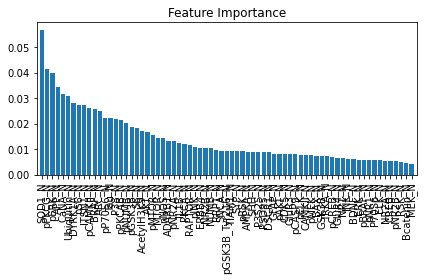

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df_new.columns[:71]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std1, y_train1)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std1.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std1.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std1.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std1.shape[1]])
plt.tight_layout()
plt.show()


In [19]:
##Subset of features
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.03, prefit=True)
X_selected = sfm.transform(X_train_std1)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 6


In [20]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) SOD1_N                         0.056866
 2) pPKCG_N                        0.041463
 3) pERK_N                         0.039936
 4) APP_N                          0.034388
 5) CaNA_N                         0.031758
 6) Ubiquitin_N                    0.031019


In [29]:
##construct a subset of the data

c1 = df_new[['class']]
c2 = df_new[['SOD1_N','pPKCG_N','pERK_N','APP_N','CaNA_N','Ubiquitin_N']]

data2 = pd.concat([c2,c1], axis=1)
data2

,SOD1_N,pPKCG_N,pERK_N,APP_N,CaNA_N,Ubiquitin_N,class
0,0.369510,1.443091,0.687906,0.453910,1.675652,1.044979,0
1,0.342279,1.439460,0.695006,0.430940,1.743610,1.009883,0
2,0.343696,1.524364,0.677348,0.423187,1.926427,0.996848,0
3,0.344509,1.612382,0.583277,0.410615,1.700563,0.990225,0
4,0.329126,1.645807,0.550960,0.398550,1.839730,0.997775,0
...,...,...,...,...,...,...,...
1075,0.820078,2.630825,0.265642,0.372216,1.364823,1.261651,7
1076,0.854258,2.593227,0.270378,0.360990,1.364478,1.254872,7
1077,0.661809,2.628286,0.255045,0.309978,1.430825,1.242248,7
1078,0.698413,2.659706,0.230649,0.341172,1.404031,1.301071,7


In [30]:
##Similarily, split the selected feature dataset into train and test
from sklearn.model_selection import train_test_split

X_sub, y_sub = data2.iloc[:, 0:6].values, data2.iloc[:, -1].values

X_train_sub, X_test_sub, y_train_sub, y_test_sub =\
    train_test_split(X_sub, y_sub, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [31]:
stdsc = StandardScaler()
X_train_sub_std = stdsc.fit_transform(X_train_sub)
X_test_sub_std = stdsc.transform(X_test_sub)

4) Model Comparison

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, solver='sag', multi_class='multinomial')
lr.fit(X_train_sub_std, y_train_sub)

LogisticRegression(multi_class='multinomial', random_state=1, solver='sag')

In [33]:
print('Training accuracy:', lr.score(X_train_sub_std, y_train_sub))
print('Test accuracy:', lr.score(X_test_sub_std, y_test_sub))

Training accuracy: 0.7142857142857143
Test accuracy: 0.6975308641975309


Logistic regression didn't perform well on the given dataset where in there is only 68% accuracy of correctly evaluating the group's classification. The reason could have been due to the presence of many classes that are difficult to segregate into its own groups in a logistic regression model. Perhaphs it would have done better in three to four classes.

In [34]:
from sklearn.ensemble import RandomForestClassifier
##modify the number of estimators to be larger, and then smaller, than the current value
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_sub_std, y_train_sub)

RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=1)

In [35]:
print('Training accuracy:', forest.score(X_train_sub_std, y_train_sub))
print('Test accuracy:', forest.score(X_test_sub_std, y_test_sub))

Training accuracy: 1.0
Test accuracy: 0.9166666666666666


As seen from the accuracy_scores in Random Forest, we can see that theres a 100% accuraty rate on training dataset. This maybe due to overfitting which has not evaluated testing data exactly as it should to training data.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_sub_std, y_train_sub)
print('Training accuracy:', knn.score(X_train_sub_std, y_train_sub))
print('Test accuracy:', knn.score(X_test_sub_std, y_test_sub))

Training accuracy: 0.8412698412698413
Test accuracy: 0.7993827160493827


Knn classification does fairly better than the above two algorithms. Although there is a slight difference in testing and training dataset, which could be a resultant of few misclassification. 

5) Experiment Summary

The data was collected from an API - UCI Machine Learning website, which was originally collected from an archive. Data preprocessing involved first with the removal of columns MouseID, Genotype, Treatment and Behavior. The last column is the class label which basically summarises genotype,treatment and behavious for each class. The next step was to address the missing values. There were no recordings of certain protein in some mice. However, the missing values were filled with median values at the initial step. In the next process, class labels were converted to integers by mapping. The features and target set were shuffled before spliting into training and test (70:30 ratio). Further, the data was standardized using StandardScalar feature for evaluating classification using different models. In this dataset, Random Forest Classifier was used to select important features which differentiate amongst the classes. Some of the important proteins are - SOD1_N, pPKCG_N, pERK_N, CaNA_N and APP_N. Refering back to missing values, there were some missing protein measurements BAD_N, BCL2_N, pCFOS_N, H3AcK18_N, EGR1_N, H3MeK4_N. Since none of these proteins were important in feature selection process, these proteins were removed from the original dataset. Feature selection was attempted again after removal of those columns. The columns with most important features were SOD1_N, pPKCG_N, pERK_N, APP_N, CaNA_N, Ubiquitin_N. Class imbalnce was not significant amongst all the classes in this dataset.
Three models were used to evaluate classification - Multiclass logistic Regression, Random Forest and KNN classification. From all the three models KNN classification performed the best. Althought, Random Forest was the best model, it showed an accuracy of 100% on the training data which may have lead to overfitting. I think the models evaluated accurately as I hoped for since there were multiple classes to address to. Biological data is often intricate to classify subtle differences. Nevertheless its always essential to address these differences to understand underlying effects on the surface. This dataset may have some overlapping outcome but genetic or protein level differences are always interesting to understand the interplay of pathways that ultimately result into one outcome. According to me, feature extraction is always challenging in biological data since its difficult to classify subtle differences. Its difficult to set the criteria of selecting features. Instead of observing for global expression of proteins in all the classes, it would have been more informative if this study was done by comparing fewer classes to answer specific learning disability.